### TODO
- [x] Ellenbogenabstand: Nicht harte Quantile, sondern abhängig von Varianz, breite der Verteilung machen. Wenn Verteilung nur über wenige mm verteilt ist, ist sie ok.
- [x] Auch Handabstände werden pro Datensatz berechnet, keine harten Quantile, sondern dynamische Bestimmung
- [x] Broken-files Gewichtung durch Fehlerhöhe quantifizieren? Größere Abweichungen stärker gewichten, als kleine
- [ ] 20020403036 Datensatz komplett kaputt, von Metriken erkannt?
- [ ] Koordinatenvergleichmetrik verbessern: 

Minimaler Distanz von einem Wert in r zu einem in l, falls Daten nicht gleichzeitig starten

Versuchen Trajektorien im Raum so zu transformieren, dass sie in Richtung der y-Achse verlaufen?
So müssten die y- und z-Koordinaten der beiden Hände/Ellbogen gleich sein
-> kann momentan nicht verglichen werden, da nicht in einer Ebene

Oder linke Hand auf Rechte spiegeln und dann Verlauf vergleichen?

## 0. Raw-Umbenennung
Benennt die Dateien in einheitliche Namen um, Ausgangspunkt müssen dazu die "takeover"-Namen sein (darf nicht mehrmals ausgeführt werden).
Fehlerhafte Datumsangaben werden korrigiert.

In [1]:
import os, sys, math, pandas as pd, numpy as np, shutil

In [3]:
files = os.listdir('../DATA/0_raw')

for file in files:
    fileNumber = file.split("_takeover",1)[0]
    if len(fileNumber) > 12: #dont repeat script
        break
    
    year = fileNumber[0:4]
    if year != '2020' and year != '2021':
        fileNumber = fileNumber.replace(year,'2020',1)
    
    if file.find("RGraspPhase") != -1:
        side="R"
    else:
        side="L"
        
    oldpath = r'../DATA/0_raw/'+file
    newpath = r'../DATA/0_raw/'+str(fileNumber)+'_raw_'+side+'.csv'
    os.rename(oldpath,newpath)

## 1. Interpolation
Momentan lineare Interpolation für bis zu 2 NaNs, andere Methoden denkbar. Erstellt neue csv-Dateien im interpolated-Ordner.

array([[<AxesSubplot:title={'center':'Dateilängen'}>]], dtype=object)

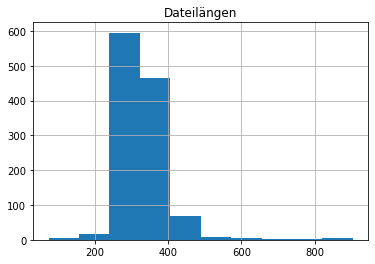

In [7]:
import os, sys, math, pandas as pd, numpy as np, shutil
files = os.listdir('../DATA/0_raw')

length_of_file = {}

for file in files:
    df = pd.read_csv('../DATA/0_raw/'+file, sep = ';')      
    interpolated_df = df.interpolate(method='linear',limit=2,limit_area='inside') 
    fileNumber = file.split("_raw",1)[0]
    side = file[-5]
    filename = '../DATA/1_interpolated/'+str(fileNumber)+'_interpolated_'+side+'.csv'
    interpolated_df.to_csv(filename, sep = ';', float_format='%.4f', na_rep='NaN', index=False)
    length_of_file.update({filename:len(interpolated_df)})

pd.DataFrame({"Dateilängen": list(length_of_file.values())}).hist()

## 4. Verschiebung zum Ursprung
Verschiebung der zugeschnittenen Dateien, sodass die rechte Hand im Ursprung startet. Außerdem Aufteilung in zwei Listen, in `r_files` für die rechte Körperhälfte und `l_files` für links.

1013 moved


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE03B53580>]],
      dtype=object)

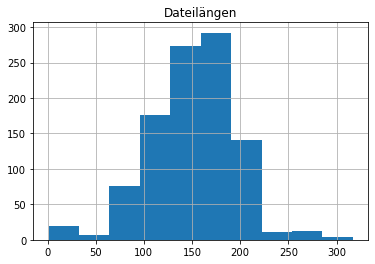

In [63]:
r_files = []
l_files = []
length_of_file = {}

for file in os.listdir('../DATA/3_truncated'):
    if file.find("R") != -1:
        df_right = pd.read_csv('../DATA/3_truncated/'+file, sep = ';')              
        if df_right.iloc[:,[0,1,2]].isna().sum().sum() == 0 and df_right.isna().sum().sum() < len(df_right)*0.2:     #check erst hier?
            fileNumber = file.split("_truncated",1)[0]
            pathOfLeftFile = '../DATA/3_truncated/'+str(fileNumber)+'_truncated_L.csv'

            relocated_right = pd.DataFrame(df_right.iloc[:,0]-df_right.iloc[0,0])
            relocated_right[df_right.columns.values[1]] = df_right.iloc[:,1]-df_right.iloc[0,1]
            relocated_right[df_right.columns.values[2]] = df_right.iloc[:,2]-df_right.iloc[0,2]
            relocated_right[df_right.columns.values[3]] = df_right.iloc[:,3]-df_right.iloc[0,0]
            relocated_right[df_right.columns.values[4]] = df_right.iloc[:,4]-df_right.iloc[0,1]
            relocated_right[df_right.columns.values[5]] = df_right.iloc[:,5]-df_right.iloc[0,2]
            relocated_right[df_right.columns.values[6]] = df_right.iloc[:,6]-df_right.iloc[0,0]
            relocated_right[df_right.columns.values[7]] = df_right.iloc[:,7]-df_right.iloc[0,1]
            relocated_right[df_right.columns.values[8]] = df_right.iloc[:,8]-df_right.iloc[0,2]           
            
            
            filename = '../DATA/4_relocated/'+str(fileNumber)+'_relocated_R.csv'
            relocated_right.to_csv(filename, sep = ';', float_format='%.4f', na_rep='NaN', index=False)
            r_files.append(filename)
            length_of_file.update({filename:len(relocated_right)})
            
            if os.path.isfile(pathOfLeftFile):
                df_left = pd.read_csv(pathOfLeftFile, sep = ';')    
                relocated_left = pd.DataFrame(df_left.iloc[:,0]-df_right.iloc[0,0])
                relocated_left[df_left.columns.values[1]] = df_left.iloc[:,1]-df_right.iloc[0,1]
                relocated_left[df_left.columns.values[2]] = df_left.iloc[:,2]-df_right.iloc[0,2]
                relocated_left[df_left.columns.values[3]] = df_left.iloc[:,3]-df_right.iloc[0,0]
                relocated_left[df_left.columns.values[4]] = df_left.iloc[:,4]-df_right.iloc[0,1]
                relocated_left[df_left.columns.values[5]] = df_left.iloc[:,5]-df_right.iloc[0,2]  
                relocated_left[df_left.columns.values[6]] = df_left.iloc[:,6]-df_right.iloc[0,0]
                relocated_left[df_left.columns.values[7]] = df_left.iloc[:,7]-df_right.iloc[0,1]
                relocated_left[df_left.columns.values[8]] = df_left.iloc[:,8]-df_right.iloc[0,2] 
                
                filename = '../DATA/4_relocated/'+str(fileNumber)+'_relocated_L.csv'
                relocated_left.to_csv(filename, sep = ';', float_format='%.4f', na_rep='NaN', index=False)
                l_files.append(filename)
                length_of_file.update({filename:len(relocated_left)})

numberOfFiles = len(r_files)+len(l_files)
print(str(numberOfFiles)+" relocated")
pd.DataFrame({"Dateilängen": list(length_of_file.values())}).hist()

## NaN-Statistik

Zählt die NaN-Werte pro Datei im Ordner data und gibt die Anzahl der Dateien ohne NaN, mit bis zu 10 NaN oder mehr als 10 NaN aus. Die Dateinamen werden jeweils im Dictionary `files_list` in die entsprechende Liste hinzugefügt.   
Es werden nur die Handgelenkdaten berücksichtigt.

In [2]:
files_list = {
    "withoutNaN" : [],
    "atleast1NaN" : [],
    "morethan10NaN": [],
    "worthToInterpolate": []
}

for file in os.listdir('./data'):
    if file.find("RGrasp") != -1:
        df = pd.read_csv('./data/'+file, sep = ';')
        wjc = df.iloc[:,[0,1,2]]
        nans_sum = wjc.isna().sum().sum()

        if nans_sum == 0:
            files_list["withoutNaN"].append(file)
        elif nans_sum >= 1:
            files_list["atleast1NaN"].append(file)
        if nans_sum > 10:
            files_list["morethan10NaN"].append(file)

print("Files without NaN: "+str(len(files_list["withoutNaN"])))
print("Files with at least 1 NaN: "+str(len(files_list["atleast1NaN"])))
print("Files with more than 10 NaN: "+str(len(files_list["morethan10NaN"])))

Files without NaN: 494
Files with at least 1 NaN: 106
Files with more than 10 NaN: 26


### Zeichnet Histogramm über die Längen der NaN-Folgen in jeder Koordinate

,x,y,z
count,127.000000,127.000000,127.000000
mean,2.960630,2.960630,2.960630
std,4.588463,4.588463,4.588463
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000
max,34.000000,34.000000,34.000000


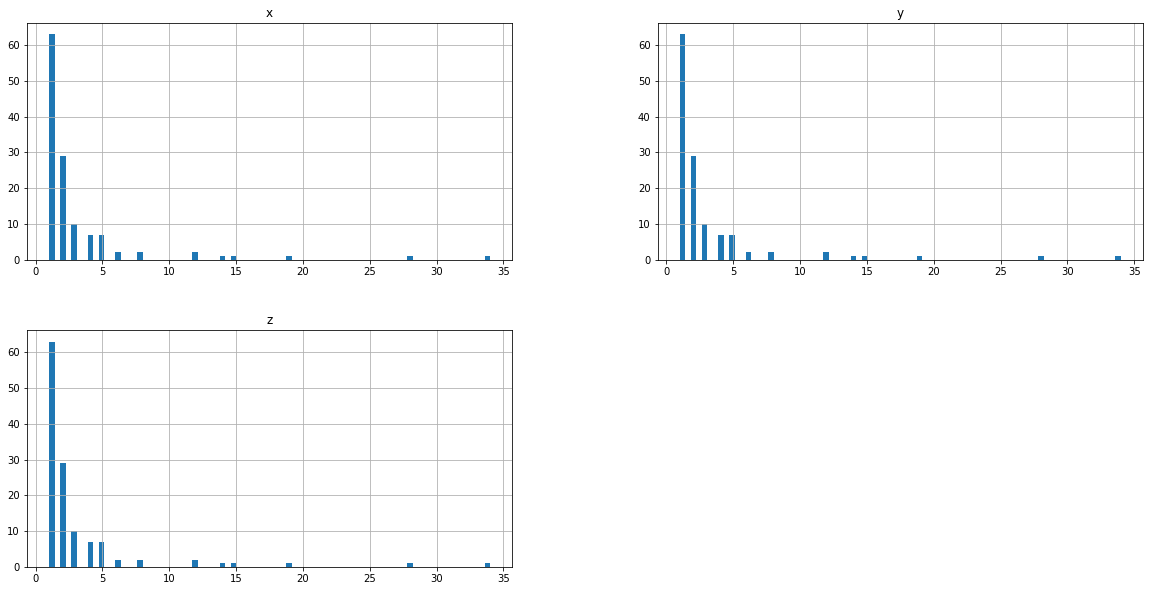

In [5]:
NaN_occurences = {
    "x":[],
    "y":[],
    "z":[]
}

counter = {
    "x":0,
    "y":0,
    "z":0
}

for file in files_list["atleast1NaN"]:
    df = pd.read_csv('./data/'+file, sep = ';')  
    wjc = df.iloc[:,[0,1,2]]
    
    for index,row in wjc.iterrows():
        if math.isnan(row[0]):
            counter["x"]+=1
        else:
            if counter["x"]!=0:
                NaN_occurences["x"].append(counter["x"])
                counter["x"]=0
                
        if math.isnan(row[1]):
            counter["y"]+=1
        else:
            if counter["y"]!=0:
                NaN_occurences["y"].append(counter["y"])
                counter["y"]=0
        
        if math.isnan(row[2]):
            counter["z"]+=1
        else:
            if counter["z"]!=0:
                NaN_occurences["z"].append(counter["z"])
                counter["z"]=0

    counter["x"] = 0
    counter["y"] = 0
    counter["z"] = 0

nans_df = pd.DataFrame(NaN_occurences)

nans_df.hist(figsize=(20,10), bins=80)
nans_df.describe()

### Fügt nach Festlegung eines Schwellwertes in "worthToInterpolate"-Liste alle Dateinamen hinzu, die maximal soviele direkt aufeinanderfolgende NaNs haben

In [ ]:
counter = {
    "x":0,
    "y":0,
    "z":0
}
threshold = 2
files_list["worthToInterpolate"].clear()

for file in files_list["atleast1NaN"]:
    df = pd.read_csv('./data/'+file, sep = ';')  
    wjc = df.iloc[:,[0,1,2]]
    
    row = 0
    while counter["x"] <= threshold and counter["y"] <= threshold and counter["z"] <= threshold:
        if math.isnan(wjc.iloc[row,0]):
            counter["x"]+=1
        if math.isnan(wjc.iloc[row,1]):
            counter["y"]+=1
        if math.isnan(wjc.iloc[row,2]):
            counter["z"]+=1
        if row == (len(wjc)-1):
            files_list["worthToInterpolate"].append(file)
            break
        else:
            row+=1
    counter["x"] = 0
    counter["y"] = 0
    counter["z"] = 0


print("Files with max. "+str(threshold)+" NaNs in a row: "+str(len(files_list["worthToInterpolate"])))

print(files_list["worthToInterpolate"])

## Startpunkte analysieren

Visualisiert die verschiedenen Startkoordinaten für x, y und z in drei Histogrammen sowie berechnet statistische Größen (für die rechte Hand).

Ausreißer: 20200423006_takeover_RGraspPhase.csv, 20200305163_takeover_RGraspPhase.csv (z)

Mehrere Hügel durch mehrere Messdurchläufe?

In [ ]:
starts = {
    "x": [],
    "y": [],
    "z": []
}

for file in files_list["withoutNaN"]:
    df = pd.read_csv('./data/'+file, sep = ';')
    starts["x"].append(df.iloc[0,0])
    starts["y"].append(df.iloc[0,1])
    starts["z"].append(df.iloc[0,2])
    
ser = pd.DataFrame(starts)
ser.hist(figsize=(20, 10), bins=50)

ser.describe()

## Abstand Ellenbogen-Handgelenk
Berechnet für jeden Zeitpunkt den Abstand von Handgelenk und Ellenbogen und ermittelt die Mittelwerte dieser Abstände pro Datensatz. Da dieser Mittelwert von den anatomischen Gegebenheiten der Messperson abhängt, wird die Verteilung der Mittelwerte pro Messung in einem Histogramm visualisiert. 



In die Liste "elbow" werden die Dateien geschrieben, deren durchschnittlicher Ellenbogen-Handgelenk-Abstand größer oder kleiner eines Schwellwertes ist. Als Schwellwert wird nicht standardmäßig das 95 und 5 Quantil ver, sondern dynamisch von Standarbweichung des Datensatzes abhängend bestimmen. Grenzwert entspricht 1,5 % der Standarabweichung.
So werden nicht immer 10 % der Daten aussortiert, sondern je breiter die Verteilung, desto mehr.


als bei 95% oder kleiner als bei 5% der Werten der jeweiligen Messung ist. Allerdings lässt dies nicht zwangsläufig den Schluss auf einen Sprung in den Handgelenksdaten zu, es können auch die Ellenbogendaten gestört sein.
Das letzte ausgegebenen Histogramm zeigt die Werte aller Messungen in einem Histogramm.

z.B. Ellenbogen mit Sprung: 20200305052_takeover_RGraspPhase.csv

2020030 upper: 243.80602660289014 lower: 241.14916748118154
56 files, 29.47 %
2020040 upper: 244.7598214476464 lower: 243.23886431012414
2 files, 2.08 %
2020042 upper: 224.69134043669624 lower: 216.4808245207712
24 files, 8.99 %
Outliers: 82


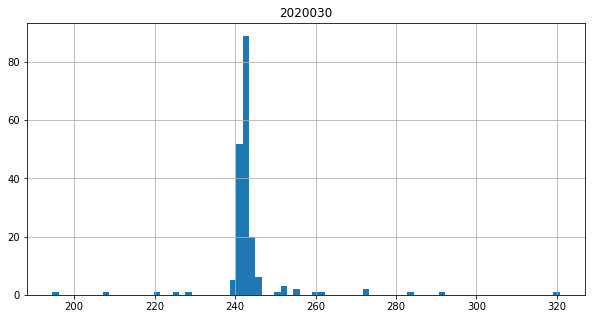

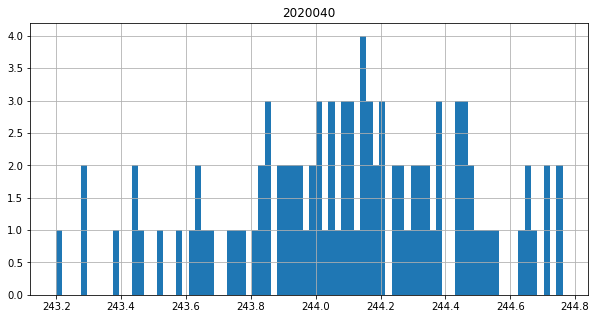

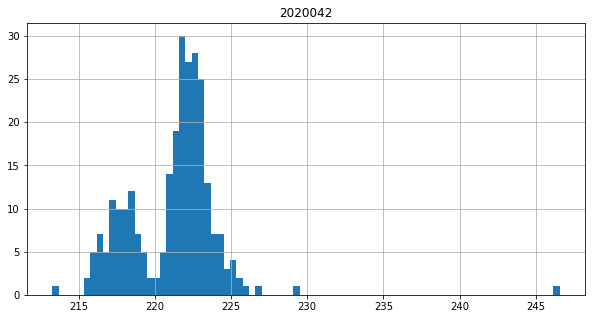

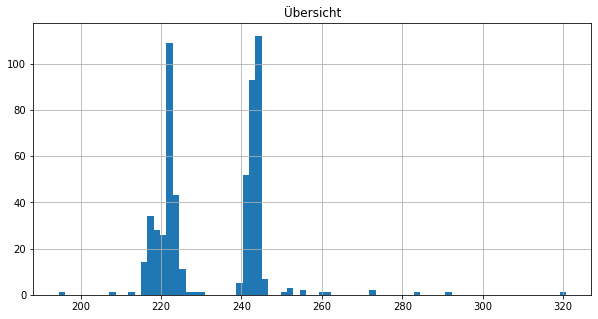

In [13]:
outliers = {
    "elbow" : {},
    "hand":{},
    "otherHand_x" : [],
    "otherHand_y" : [],
    "otherHand_z": {},
}

distances =  {}
thresholds = {}

FACTOR = 0.015

prevFileNumber = ''
for file in r_files:
    fileNumber = file[20:27]
    df = pd.read_csv(file, sep = ';')
    dist = []

    for index, row in df.iloc[:,[0,1,2,3,4,5]].iterrows():       
        dist.append(math.sqrt((row[0]-row[3])**2 + (row[1]-row[4])**2 + (row[2]-row[5])**2))
    mean = pd.Series(dist).mean()
    
    if fileNumber != prevFileNumber:
        distances.update({fileNumber:{}})
    distances[fileNumber].update({file:mean})
    prevFileNumber = fileNumber
    
for key in distances.keys():
    df_distances = pd.DataFrame({key: list(distances[key].values())})
    df_distances.hist(figsize=(10, 5), bins=80)
    threshold_value = df_distances.std()[0] * FACTOR
    upper_bound = df_distances.quantile(q=(1-threshold_value))[0]
    lower_bound = df_distances.quantile(q=threshold_value)[0]
    thresholds.update({key:[lower_bound, upper_bound]})
    print(key+" upper: "+str(upper_bound)+" lower: "+str(lower_bound))
    
    counter=0
    for val in df_distances.lt(lower_bound).iloc[:,0]:
        if val:
            counter+=1
    for val in df_distances.gt(upper_bound).iloc[:,0]:
        if val:
            counter+=1
    percentage = len(distances[key].values())        
    print(str(counter) + " files, "+ str(round(100*counter/percentage,2))+" %")
pd.DataFrame({"Übersicht":distances_old}).hist(figsize=(10,5), bins = 80)

idx = 0
for file in r_files:
    fileNumber = file[20:27]
    if distances[fileNumber][file] > thresholds[fileNumber][1] or distances[fileNumber][file] < thresholds[fileNumber][0]:
        meanOfAllValues = pd.DataFrame(distances[key].values()).mean()[0]
        normalized_value = abs(meanOfAllValues - distances[fileNumber][file])/meanOfAllValues
        outliers["elbow"].update({file:distances[fileNumber][file]})
    idx+=1
    
normalized_values = list(outliers["elbow"].values())
max_normalized_value = max(normalized_values)
min_normalized_value = min(normalized_values)
for fileNumber in list(outliers["elbow"].keys()):
    outliers["elbow"][fileNumber] = (outliers["elbow"][fileNumber]-min_normalized_value)/(max_normalized_value-min_normalized_value)
    
print("Outliers: "+str(len(outliers["elbow"])))

## Handgelenkvergleich
Berechnet zunächst pro Messdurchlauf die durchschnittlichen Handabstände, diese variieren naturgemäß, da während der Bewegung die Hände sich voneinander entfernen. Dennoch lassen sich über die Mitterlwerte Ausreißer identifzieren. Die Grenze für Ausreißer wird dynamisch pro Messdurchlauf definiert, sie hängt von der Standardabweichung des Durchlaufs ab.

Außerdem wird die Differenz der z-Koordinaten für die Trajektorien von linker und rechter Hand gebildet, diese sollte weitesgehend 0 sein, sofern sich die Hände gleichzeitig hoch/runter bewegen. Größere Abweichungen zeigen Ausreißer an. Auch hier dynamische Schwellwertdefinition

Generell könnten auch noch x,y Koordinaten verglichen werden, liegen aber in Ursprungsdaten noch nicht in einer Ebene. Transformation notwendig.

=> Sprünge können aber auch in für uns nicht relevanten linken Hand vorkommen.


Problem: Datensätze haben unterschiedliche Länge, sollten davor noch zugeschnitten werden

2020030 hand upper: 673.8186299440251, hand lower: 471.0851745303779, z upper: 258.23781320747906
16 hand files, 10 z files
2020040 hand upper: 933.0913892703209, hand lower: 585.1613640145496, z upper: 551.5595389582622
34 hand files, 13 z files
2020042 hand upper: 661.3904556446033, hand lower: 398.9129728854298, z upper: 327.08651517601936
40 hand files, 25 z files
new hand: 90, new z: 48


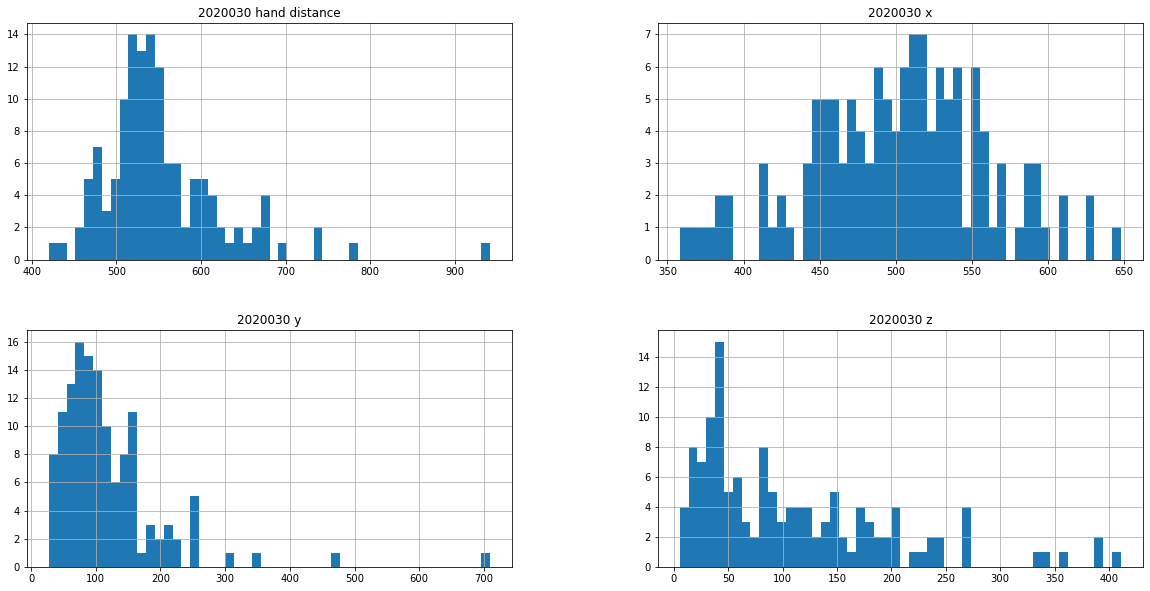

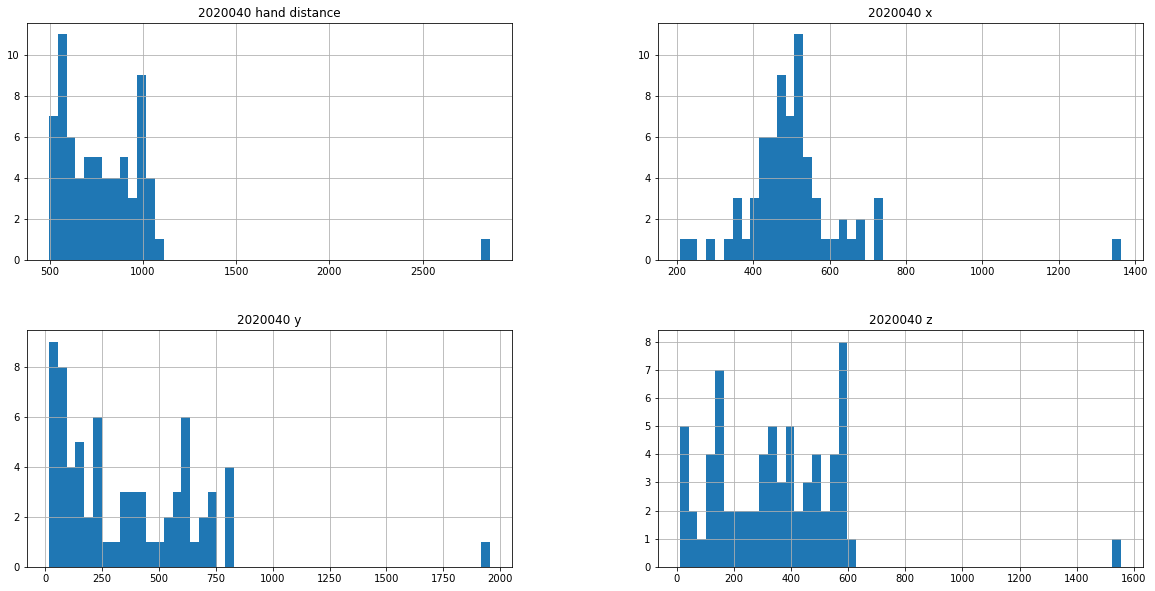

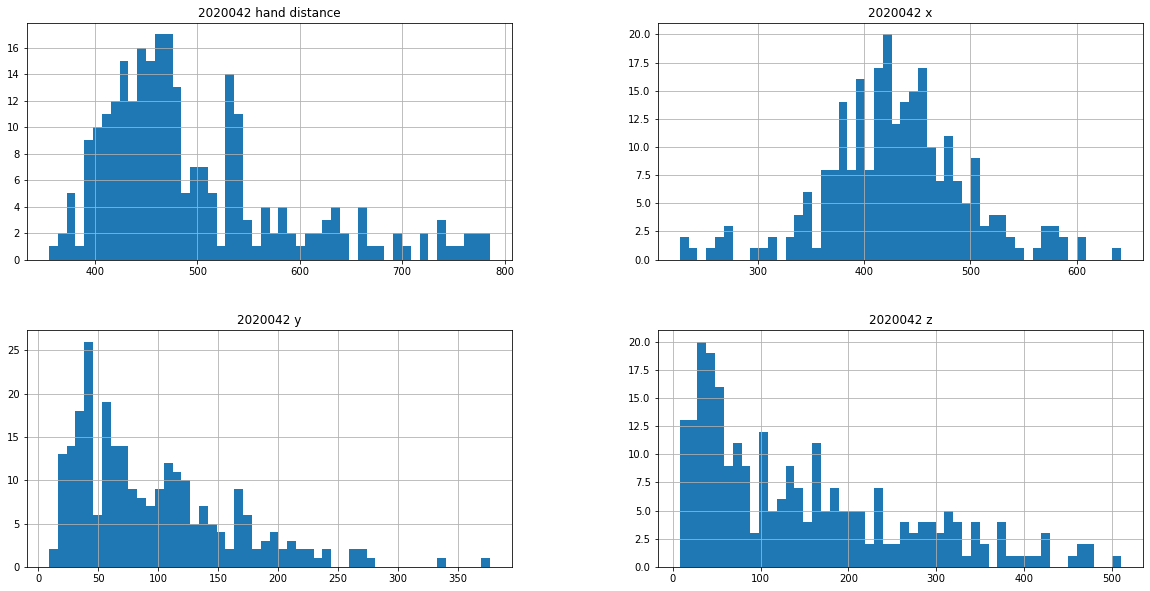

In [68]:
differences = {
    "x":{},
    "y":{},
    "z":{},
    "hands":{}
}
threshold = {
    "x" : 0,
    "y" : 0,
    "z" : {},
    "hands" : {}
}
outliers["otherHand_x"].clear()
outliers["otherHand_z"].clear()
outliers["hand"].clear()
outliers["otherHand_y"].clear()
r_with_l = []

FACTOR = 0.0008
FACTOR_Z = 0.0008

prevFileNumber = ''
for file in r_files:
    fileNumber = file[20:27]
    if file.find("R") != -1:
        startOfFile = file.split("R",1)[0]
        pathOfOtherFile = startOfFile + 'L.csv'
    else:
        startOfFile = file.split("L",1)[0]
        pathOfOtherFile = startOfFile+'R.csv'
    if os.path.isfile(pathOfOtherFile):
        r_with_l.append(file)
        side1 = pd.read_csv(file, sep = ';').iloc[:,[0,1,2]]
        side2 = pd.read_csv(pathOfOtherFile, sep = ';').iloc[:,[0,1,2]]
                
        x_diff = []
        y_diff = []
        z_diff = []
        hands = []
        idx = 0
        while idx<(len(side1)-1) and idx<(len(side2)-1):
            y_diff.append(abs(side1.iloc[idx,1]-side2.iloc[idx,1]))
            z_diff.append(abs(side1.iloc[idx,2]-side2.iloc[idx,2]))
            x_diff.append(abs(side1.iloc[idx,0]-side2.iloc[idx,0]))
            hands.append(math.sqrt((side1.iloc[idx,0]-side2.iloc[idx,0])**2 + (side1.iloc[idx,1]-side2.iloc[idx,1])**2 + (side1.iloc[idx,2]-side2.iloc[idx,2])**2))
            idx+=1
        if fileNumber != prevFileNumber:
            differences["hands"].update({fileNumber:{}})
            differences["x"].update({fileNumber:{}})
            differences["y"].update({fileNumber:{}})
            differences["z"].update({fileNumber:{}})
        differences["hands"][fileNumber].update({file:pd.Series(hands, dtype="float64").mean()})
        differences["x"][fileNumber].update({file:pd.Series(x_diff, dtype="float64").mean()})
        differences["y"][fileNumber].update({file:pd.Series(y_diff, dtype="float64").mean()})
        differences["z"][fileNumber].update({file:pd.Series(z_diff, dtype="float64").mean()})
        prevFileNumber = fileNumber

for fileNumber in differences["hands"].keys():
    hand_distances_key = fileNumber+" hand distance"
    z_key = fileNumber + " z"
    df= pd.DataFrame({
        hand_distances_key : list(differences["hands"][fileNumber].values()),
        fileNumber+" x" : list(differences["x"][fileNumber].values()),
        fileNumber+" y" : list(differences["y"][fileNumber].values()),
        z_key : list(differences["z"][fileNumber].values())
    })
    df.hist(figsize=(20, 10), bins=50)    
    threshold_value = df.loc[:,hand_distances_key].std() * FACTOR
    upper_bound = df.loc[:,hand_distances_key].quantile(q=(1-threshold_value))
    lower_bound = df.loc[:,hand_distances_key].quantile(q=threshold_value)
    threshold["hands"].update({fileNumber:[lower_bound, upper_bound]})
    threshold_value = df.loc[:,z_key].std() * FACTOR_Z
    upper_bound_z = df.loc[:,z_key].quantile(q=(1-threshold_value))
    threshold["z"].update({fileNumber:upper_bound_z})
    print(fileNumber+" hand upper: "+str(upper_bound)+", hand lower: "+str(lower_bound)+", z upper: "+str(upper_bound_z))

    counter=0
    for val in df.loc[:,hand_distances_key].lt(lower_bound):
        if val:
            counter+=1
    for val in df.loc[:,hand_distances_key].gt(upper_bound):
        if val:
            counter+=1
    counter_z=0
    for val in df.loc[:,z_key].gt(upper_bound_z):
        if val:
            counter_z+=1
    print(str(counter) + " hand files, "+str(counter_z)+" z files")

for file in r_with_l:
    fileNumber = file[20:27]
    if differences["hands"][fileNumber][file] > threshold["hands"][fileNumber][1] or differences["hands"][fileNumber][file] < threshold["hands"][fileNumber][0]:
        meanOfAllValues = pd.DataFrame(differences["hands"][fileNumber].values()).mean()[0]
        normalized_value = abs(meanOfAllValues - differences["hands"][fileNumber][file])/meanOfAllValues
        outliers["hand"].update({file:normalized_value})
    if differences["z"][fileNumber][file] > threshold["z"][fileNumber]:
        meanOfAllValues = pd.DataFrame(differences["z"][fileNumber].values()).mean()[0]
        normalized_value = abs(meanOfAllValues - differences["z"][fileNumber][file])/meanOfAllValues
        outliers["otherHand_z"].update({file:normalized_value})

normalized_values = list(outliers["hand"].values())
max_normalized_value = max(normalized_values)
min_normalized_value = min(normalized_values)
for fileNumber in list(outliers["hand"].keys()):
    outliers["hand"][fileNumber] = (outliers["hand"][fileNumber]-min_normalized_value)/(max_normalized_value-min_normalized_value)

normalized_values = list(outliers["otherHand_z"].values())
max_normalized_value = max(normalized_values)
min_normalized_value = min(normalized_values)
for fileNumber in list(outliers["otherHand_z"].keys()):
    outliers["otherHand_z"][fileNumber] = (outliers["otherHand_z"][fileNumber]-min_normalized_value)/(max_normalized_value-min_normalized_value)
        
print("new hand: "+str(len(outliers["hand"]))+", new z: "+str(len(outliers["otherHand_z"])))

## Geschwindigkeitsanalyse

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE05003220>,
      dtype=object)

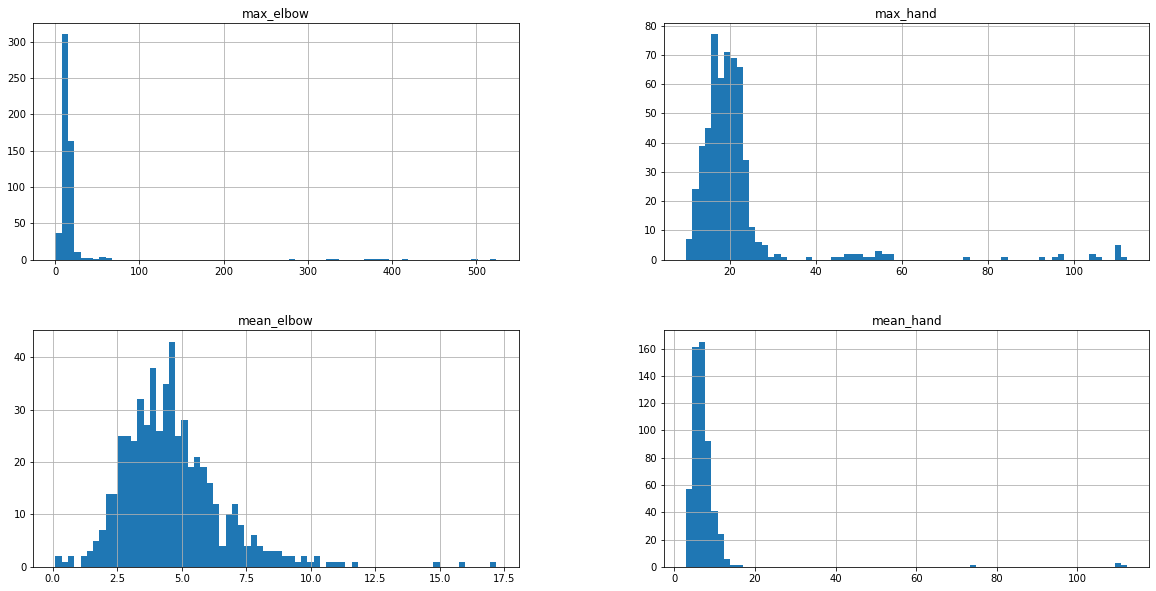

In [24]:
velo_stats = {
    "max_hand":[],
    "mean_hand":[],
    "max_elbow":[],
    "mean_elbow":[]
}


for file in r_files:
    df = pd.read_csv(file, sep = ';')
    v_df = np.gradient(df, axis=0)
    velos_hand = np.sqrt(np.square(v_df[:,0])+np.square(v_df[:,1])+np.square(v_df[:,2]))
    velos_elbow = np.sqrt(np.square(v_df[:,3])+np.square(v_df[:,4])+np.square(v_df[:,5]))
    velo_stats["max_hand"].append(np.max(velos_hand)*1.2)
    velo_stats["mean_hand"].append(np.mean(velos_hand)*1.2)
    velo_stats["max_elbow"].append(np.max(velos_elbow)*1.2)
    velo_stats["mean_elbow"].append(np.mean(velos_elbow)*1.2)

pd.DataFrame(velo_stats).hist(figsize=(20, 10), bins=70)

## Schnittmenge
Welche Daten aussortieren? Vereinigung aller Ausreißer? Wenn Datei bei mind. zwei Ausreißern dabei ist? Dabei sind Ausreißer bei Hand- und Ellbogenabständen stärker zu gewichten. Din Ellbogenabstandausreißer und Auffälligkeiten im Vergleich zur anderen Hand lassen auf eine Störung der Handdaten schließen. 
Handabstände auch mit 3 gewichten??

Zu jedem Art Ausreißer werden zudem noch die normalized_values erfasst, die die Stärke des Ausreißer quantifizieren sollen. Sie stellen das Verhältnis des Abstands zum Mittelwert des Messdurchlaufs zum Mitelwert selbst dar und werden auf das Intervall 0-1 normiert.

Broken files werden in den 99_broken Ordner geschrieben, im csv wird die Headerzeile durch eine Begründung der Aussortierung ergänzt. Angegeben werden die normierten Werte der Stärke der Ausreißer für z-Koordinate, Handabstände und Ellenbogenabstände.

3.884354687916958
Broken: 89


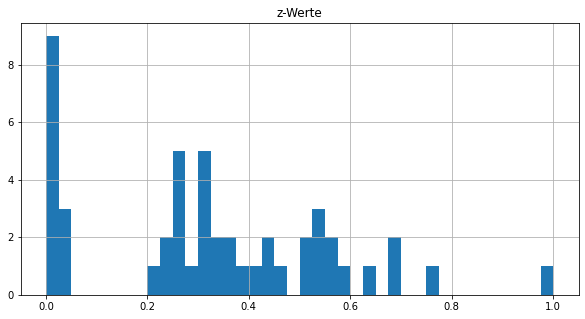

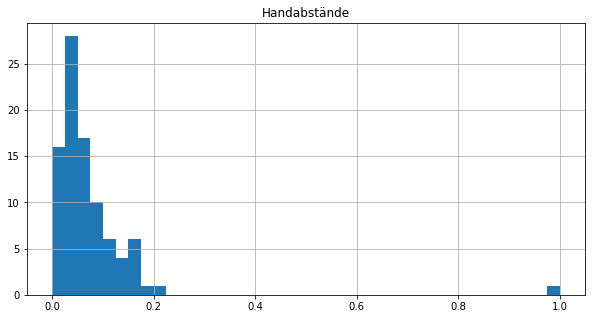

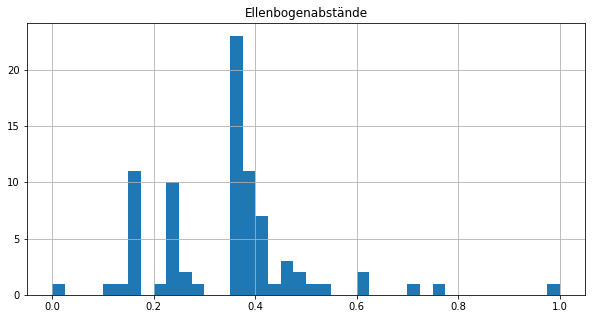

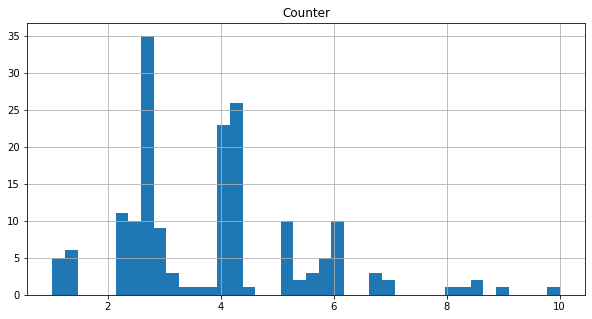

In [69]:
intersec = [value for value in list(outliers["otherHand_z"].keys()) if value in list(outliers["hand"].keys()) if value in list(outliers["elbow"].keys()) ]
union = list(set().union(list(outliers["otherHand_z"].keys()),list(outliers["hand"].keys()),list(outliers["elbow"].keys())))

#print(len(intersec))
#print(len(union))

broken_files = {}
pd.DataFrame({"z-Werte":list(outliers["otherHand_z"].values())}).hist(figsize=(10,5),bins=40)
pd.DataFrame({"Handabstände":list(outliers["hand"].values())}).hist(figsize=(10,5),bins=40)
pd.DataFrame({"Ellenbogenabstände":list(outliers["elbow"].values())}).hist(figsize=(10,5),bins=40)

counters = []

for file in r_files:
    counter = 0
    outlier_value_z = 0
    outlier_value_hand = 0
    outlier_value_elbow = 0
    if file in list(outliers["otherHand_z"].keys()):
        outlier_value_z = outliers["otherHand_z"][file]
        counter+=1+outlier_value_z
    if file in list(outliers["hand"].keys()):
        outlier_value_hand = outliers["hand"][file]
        counter+=4*(1+outlier_value_hand)
    if file in list(outliers["elbow"].keys()):
        outlier_value_elbow = outliers["elbow"][file]
        counter+=2*(1+outlier_value_elbow)
    if counter != 0:
        counters.append(counter)
    if counter > 4:
        broken_files.update({file:[outlier_value_z, outlier_value_hand, outlier_value_elbow]})

df = pd.DataFrame({"Counter":counters})
df.hist(figsize=(10,5),bins=40)
print(df.mean()[0])

print("Broken: "+str(len(broken_files.keys())))

for f in os.listdir('../DATA/5_filtered'):
    os.remove(os.path.join('../DATA/5_filtered', f))
for f in os.listdir('../DATA/99_broken'):
    os.remove(os.path.join('../DATA/99_broken', f))

for file in os.listdir('../DATA/4_relocated'):
    if file.find("R") != -1:
        side="R"
    else:
        side="L"
    fileNumber = file.split("_relocated",1)[0]
    if '../DATA/4_relocated/'+file in broken_files.keys():
        new_folder = '../DATA/99_broken/'
        z_value = round(broken_files['../DATA/4_relocated/'+file][0],3)
        hand_value = round(broken_files['../DATA/4_relocated/'+file][1],3)
        elbow_value = round(broken_files['../DATA/4_relocated/'+file][2],3)
        
        broken_file = open('../DATA/4_relocated/'+file,'r')
        appended_file = open('../DATA/99_broken/'+str(fileNumber)+'_broken_'+side+'.csv','w')
        broken_content = broken_file.readlines()
        appended_file.write('#z-difference='+str(z_value)+', hand-distance='+str(hand_value)+', elbow-hand-distance='+str(elbow_value)+'\n')
        for line in broken_content:
            if line == broken_content[0]:
                continue
            appended_file.write(line)
        broken_file.close()
        appended_file.close()
        pathOfOtherFile='../DATA/4_relocated/'+str(fileNumber)+'_relocated_L.csv'
        if os.path.isfile(pathOfOtherFile):
            shutil.copyfile(pathOfOtherFile,'../DATA/99_broken/'+str(fileNumber)+'_broken_L.csv')
    else:
        shutil.copyfile('../DATA/4_relocated/'+file,'../DATA/5_filtered/'+str(fileNumber)+'_filtered_'+side+'.csv')